# **Introduction**

Greetings,

Welcome to this hands-on exercise notebook where we embark on a journey to tackle a regression task: predicting the fare amount for taxi trips in New York City. Throughout this tutorial, our focus will be on handling outliers, cleaning data, engineering essential features, and ultimately training a Random Forest Regressor model.

## **Overview**

### **1. Problem Statement**
Before we delve into the technical aspects, let's define the problem at hand. Our objective is to build a regression model capable of predicting the fare amount for taxi trips in New York City. This entails predicting a continuous numerical value, making it a regression task.

### **2. Dataset**
The dataset we'll be working with contains various features related to taxi trips, including distance, pickup/dropoff locations, passenger count, and, most importantly, the fare amount. Similar to the Titanic tutorial, the dataset is divided into a training set for model development and a test set for evaluation.

**Dataset Download:**
To follow along, you can access the [dataset](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data) from Kaggle. Ensure that the files are in the same folder as this notebook.

This tutorial will guide you through the essential steps of regression analysis, providing a practical and informative introduction to machine learning applied to regression tasks. Let's get started!

# **Table of Contents**

## 1. Loading Data and Exploratory Data Analysis (EDA)

In this section, we will concentrate on loading the dataset and conducting initial Exploratory Data Analysis (EDA) to gain insights into the structure and nature of the data. This step is crucial for understanding the dataset's characteristics before further processing.

**Tasks:**
- Load the dataset into a Pandas DataFrame.
- Display basic statistics using `describe()` and investigate the first few rows using `head()`.
- Visualize key features to identify patterns or trends.

## 2. Data Processing

### 2.1 Data Cleaning: Dealing with Outliers

Addressing outliers is a critical step in preparing the dataset for modeling. In this section, we'll explore strategies to handle outliers, ensuring our data is ready for the machine learning pipeline.

**Tasks:**
- Identify and analyze outliers.
- Implement appropriate strategies such as removal or transformation.

### 2.2 Feature Engineering

Feature engineering involves creating new features or modifying existing ones to enhance the model's performance. In this section, we'll delve into feature engineering techniques.

**Tasks:**
- Create relevant features that might contribute to the predictive power of the model.

### 2.3 Normalization

Normalization ensures that numerical features are on a consistent scale, preventing certain features from dominating others. We'll incorporate normalization into our data processing pipeline.

**Tasks:**
- Implement normalization techniques to scale numerical features.

## 3. Training, Predictions, and Submitting Results

### 3.1 Training

With the data preprocessed, we can move on to the modeling phase. In this section, we'll explore different machine learning models and train them on our processed dataset.

**Tasks:**
- Select a set of regression models.
- Train the models using the processed data.

### 3.2 Predictions

After training the models, we'll use them to make predictions on the test set.

**Tasks:**
- Generate predictions on the test set using the trained models.

### 3.3 Submitting Results

The final step involves preparing the results, including creating a submission file in the required format.

**Tasks:**
- Create a submission file with the predicted fare amounts.
- Optionally, submit the results on Kaggle to assess your performance.

In [1]:
# setting up the libraries that we will need 
import pandas as pd
import numpy as npimport matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **1. Loading Data and Exploratory Data Analysis (EDA):**

The New York City fare prediction dataset comprises a vast 55 million lines. However, due to memory constraints, we will focus our analysis on the first 2 million lines. This subset will provide us with a representative sample to perform our initial exploration and gain valuable insights into the dataset's structure and characteristics.

In [2]:
# loading the data
train = pd.read_csv("train.csv", nrows= 2000000)
test = pd.read_csv("test.csv")
train.name = "Train"
test.name = "Test"

In [ ]:
# Get the plot_correlations from the previous fnotebook and adapt it to our needs

In [ ]:
#data exploration: print the first 5 rows of the train dataset
train.ADD CODE HERE

In [ ]:
# data exploration: get the infor the describe
ADD CODE HERE

In [ ]:
ADD CODE HERE

In [ ]:
# Extracting and Analyzing Coordinate Columns

# Define the columns containing geographic coordinates
coordinates_columns = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Combine both the training and test datasets for comprehensive analysis
combined_datasets = [train, test]

# Iterate over each coordinate column and dataset
for coord in coordinates_columns:
    for dataset in combined_datasets:
        # Find the maximum and minimum values for the current coordinate column
        max_value = dataset[coord].max()
        min_value = dataset[coord].min()
        
        # Display the range of coordinates in the current dataset
        print(f"Range of {coord} in {dataset.name} dataset: ({max_value:.3f}, {min_value:.3f})")

# Clear the combined datasets from memory
del combined_datasets


In [ ]:
#What is the distribution of passenger counts in the test and train datasets?
ADD CODE HERE
ADD CODE HERE

In [ ]:
# How many instances in the training dataset have a negative fare amount?
ADD CODE HERE


Isn't it strange that some of the fares are negative? Let's remove them from the training dataset.
Always when working on a dataset and exploring the columns. Some domain knowladge is required to make sure what we are doing makes sense.

**Improvement:**
The geographical coordinates of New York City typically range from approximately 71° 47' 25" W to 79° 45' 54" W for longitude and 40° 29' 40" N to 45° 0' 42" N for latitude. However, within this dataset, some instances exhibit anomalous values, such as longitude around 3457 and latitude near 3344. Conversely, the test data aligns more closely with the expected boundaries for NYC longitude and latitude.

Similar outliers are observed in other features, including passenger counts exceeding 280 or being equal to 0, as well as instances with negative fare amounts. These outliers will be addressed and removed during the data processing section to ensure the integrity and reliability of the dataset for subsequent analysis.

In [13]:
# create a an fare amount category attribute with five bins to understand better this attribute
train["fare_amount_1"]=pd.cut(train["fare_amount"],
                            bins=[0., 6.0,12.,48.,150., np.inf],
                                  labels = [1,2,3,4,5])

<AxesSubplot:>

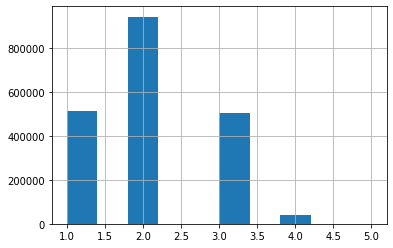

In [14]:
train["fare_amount_1"].hist()

In [ ]:
# Provide the distribution of values in the 'fare_amount_1' column of the training dataset?
ADD CODE HERE

The majority of fare amounts fall within the range of 6 to 12 USD, with a relatively even distribution between 0 to 6 USD and 12 to 48 USD. However, values exceeding 150 USD are considered unrealistic. Although there are approximately 200 instances with such values, their presence may adversely impact the model. As a result, we plan to address and remove these outliers during the data processing section to enhance the robustness of our model.

In [16]:
# Create a dictionary with NYC coordinates that will be used in deleting outliers
coordinates = {'min_long': ADD CODE HERE, ADD CODE HERE),
              'max_long': ADD CODE HERE, ADD CODE HERE),
              'min_lat': ADD CODE HERE, ADD CODE HERE),
              'max_lat' : ADD CODE HERE, ADD CODE HERE),}

In [17]:
# To enhance the clarity of our data visualization, we will utilize `plt.xlim` to set specific boundaries on 
# the x-axis during plotting. This focused view will provide a more detailed observation of the data distribution.

# Define city borders for limiting axes during plotting
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

(-74.03, -73.75)

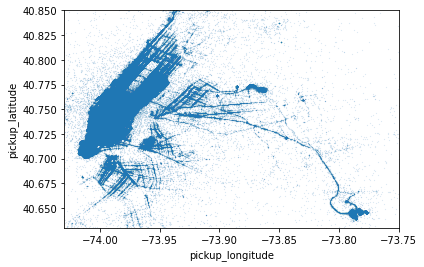

In [18]:
filtered_data = train[
    (train['pickup_longitude'] >= coordinates['min_long']) & 
    (train['pickup_longitude'] <= coordinates['max_long']) & 
    (train['pickup_latitude'] >= coordinates['min_lat']) & 
    (train['pickup_latitude'] <= coordinates['max_lat']) &
    (train['dropoff_longitude'] >= coordinates['min_long']) &
    (train['dropoff_longitude'] <= coordinates['max_long']) &
    (train['dropoff_latitude'] >= coordinates['min_lat']) & 
    (train['dropoff_latitude'] <= coordinates['max_lat'])
]

filtered_data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', s=0.02, alpha=0.4)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

Upon visualizing the pickup data from the training set, a map resembling NYC is evident. Notably, three specific locations exhibit a high pickup density, which correspond to key airports:
- JFK Airport
- LaGuardia Airport

It's worth mentioning that NYC has another airport, namely Newark Airport. Leveraging this geographical insight, we can generate additional features indicating whether a pickup or dropoff occurred at each airport. This expanded feature set could potentially enhance our model's predictive capabilities.

## **2. Data Processing**
### 2.1 Data Cleaning: Handling Outliers
As identified in the previous section, our dataset exhibits numerous outliers that could adversely impact our model's performance. Therefore, in this step, we will address this issue by removing such outliers.

* Remove rows with negative or fare amounts exceeding 150 USD.
* Eliminate rows with unrealistic coordinates.
* Round coordinates to three decimal places for computational efficiency.

In [19]:
class DataCleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        initial_length = len(X)
        
        if X.name == 'Train':

            # Remove rows with unrealistic fare amounts: Negative and superior to 150
            X = ADD CODE HERE
            
            # Drop the 'fare_amount_1' feature as it's no longer needed
            X = ADD CODE HERE
            
            # Remove rows with invalid passenger counts: Less than zero and more than 8
            X = ADD CODE HERE
            
            # Remove rows with unrealistic pickup and dropoff coordinates
            X = ADD CODE HERE
            X = ADD CODE HERE
            X = ADD CODE HERE
            X = ADD CODE HERE

        # Round coordinates to three decimal places for computational efficiency
        X.pickup_longitude = X.pickup_longitude.apply(lambda x: round(x, 3))
        X.pickup_latitude = X.pickup_latitude.apply(lambda x: round(x, 3))
        X.dropoff_longitude = X.dropoff_longitude.apply(lambda x: round(x, 3))
        X.dropoff_latitude = X.dropoff_latitude.apply(lambda x: round(x, 3))

        deleted_rows = initial_length - len(X)
        print(f"{deleted_rows} rows have been deleted.")

        return X


### 2.2 Feature Engineering:

The dataset initially provides only 5 features, which might be insufficient for training a robust model. To enhance the feature set, we will incorporate additional attributes.

#### 2.2.1 Extracting Date and Time:

Utilizing the existing date attribute, which is not in a format conducive to analysis, we will derive 5 new attributes:
- Year
- Month
- Day
- Day of the Week
- Hour


In [20]:
class DateTimeExtraction(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        This transformer extracts temporal features from the 'key' attribute and enhances the dataset.
        
        Parameters:
        - X (DataFrame): Input DataFrame containing the 'key' attribute in datetime format.
        
        Returns:
        - X (DataFrame): Transformed DataFrame with additional temporal features.
        """
        X['key'] = pd.to_datetime(X.key, format="%Y-%m-%d %H:%M:%S")
        X['year'] = X.key.dt.year
        X['month'] = ADD CODE HERE
        X['day'] = ADD CODE HERE
        X['dayOfTheWeek'] = ADD CODE HERE
        X["hour"] = ADD CODE HERE
        X.drop("pickup_datetime", axis=1, inplace=True)
        return X   


#### 2.2.2 Airport pickup and dropoff
As mentionned earlier, NYC has 3 airports. We all now that taxis pick and drop passangers frequently from these kind of locations. So for each airport we will add 2 columnes: pick_up and drop_off.

In [21]:
#nyc_airports coordinates
nyc_airports={'JFK':{'min_lng':-73.835,
                     'min_lat':40.619,
                     'max_lng':-73.740, 
                     'max_lat':40.665},
              
              'EWR':{'min_lng':-74.192,
                     'min_lat':40.670, 
                     'max_lng':-74.153, 
                     'max_lat':40.708},
              
        'LaGuardia':{'min_lng':-73.889, 
                     'min_lat':40.766, 
                     'max_lng':-73.855, 
                     'max_lat':40.793}
                }

In [22]:
def is_airport_pickup_dropoff(latitude, longitude, airport_coordinates):
    """
    This function assigns 1 if the given coordinates represent a pickup or dropoff from a specified airport.

    Parameters:
    - latitude (float): Latitude of the location.
    - longitude (float): Longitude of the location.
    - airport_coordinates (dict): Dictionary containing the boundaries of the airport.

    Returns:
    - int: 1 if it's a pickup or dropoff from the specified airport, 0 otherwise.
    """
    if (latitude >= airport_coordinates['min_lat'] and
        latitude <= airport_coordinates['max_lat'] and
        longitude >= airport_coordinates['min_lng'] and
        longitude <= airport_coordinates['max_lng']):
        return 1
    else:
        return 0


In [23]:
class AirportData(BaseEstimator, TransformerMixin):
    """
    A custom transformer to add columns indicating whether a trip involves pickup or dropoff at specific airports.
    """
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """
        Transform the DataFrame by adding columns for airport pickup and dropoff indicators.

        Parameters:
        - X (DataFrame): The input DataFrame.

        Returns:
        - DataFrame: The transformed DataFrame with added airport pickup and dropoff columns.
        """
        X['pick_up_JFK'] = X.apply(lambda row: is_airport_pickup_dropoff(row['pickup_latitude'], row['pickup_longitude'], 'JFK'), axis=1)
        X['dropoff_JFK'] = X.apply(lambda row: is_airport_pickup_dropoff(row['dropoff_latitude'], row['dropoff_longitude'], 'JFK'), axis=1)
        X['pickup_EWR'] = X.apply(lambda row: is_airport_pickup_dropoff(row['pickup_latitude'], row['pickup_longitude'], 'EWR'), axis=1)
        X['dropoff_EWR'] = X.apply(lambda row: is_airport_pickup_dropoff(row['dropoff_latitude'], row['dropoff_longitude'], 'EWR'), axis=1)
        X['pickup_la_guardia'] = X.apply(lambda row: is_airport_pickup_dropoff(row['pickup_latitude'], row['pickup_longitude'], 'LaGuardia'), axis=1)
        X['dropoff_la_guardia'] = X.apply(lambda row: is_airport_pickup_dropoff(row['dropoff_latitude'], row['dropoff_longitude'], 'LaGuardia'), axis=1)
        return X

#### 2.2.3 Distance
Incorporating distance-related features is crucial for enhancing our model's predictive capabilities. To achieve this, we introduce the following essential metrics:

- **Trip Distance:** Calculated using the Haversine formula, the trip distance represents the geographical distance between the pickup and dropoff locations.

- **Latitude Distance:** This feature captures the difference in latitude between the dropoff and pickup points, providing insights into the north-south span of the trip.

- **Longitude Distance:** Similarly, the longitude distance signifies the east-west variation between the dropoff and pickup coordinates, aiding in understanding the lateral extent of the journey.

By integrating these distance-related features, we aim to empower our model with valuable spatial information, contributing to a more comprehensive representation of the taxi trips in our dataset.

In [1]:
# Haversine Formula for Trip Distance Calculation

# The Haversine formula, implemented in the provided function, is a fundamental method for estimating distances 
# between two points on the Earth's surface using their latitudinal and longitudinal coordinates. Below is a breakdown 
# of the formula's components:

def trip_distance(lat1, lat2, lon1, lon2):
    p = 0.017453292519943295  # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p) / 2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# - **p (Pi/180):** Conversion factor from degrees to radians.
# - **a:** Intermediate calculation involving the Haversine formula.
# - **0.6213712 * 12742:** Constants for converting the result to miles. (0.6213712 for miles, 12742 for Earth's diameter in km)
# - **np.arcsin(np.sqrt(a)):** Inverse Haversine calculation.

In [25]:
class DistanceFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Adding the trip_distance feature using the Haversine formula
        X['trip_distance'] = X.apply(lambda row: trip_distance(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']), axis=1)
        
        # Calculating the absolute difference in latitude and longitude
        X["diff_lat"] = abs(X.pickup_latitude - X.dropoff_latitude)
        X["diff_long"] = abs(X.pickup_longitude - X.dropoff_longitude)
        
        return X


# 2.3 Data Normalization

In this section, we focus on the normalization of our dataset. With all the engineered features in place, normalization becomes essential to ensure uniform scaling across the various attributes, facilitating efficient and expedited model training. The process involves standardizing the feature values, reducing the data size, and optimizing computational resources for faster model training.

In [26]:
class Normalization(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Normalizing the 'year' attribute
        X.year = (X.year - 2009)
        max_year = X.year.max()
        X.year = X.year / max_year

        # Normalizing the 'month' attribute
        X.month = X.month + X.year * 12
        max_month = X.month.max()
        X.month = X.month / max_month

        # Normalizing the 'day' attribute
        max_day = X.day.max()
        X.day = X.day / max_day

        # Normalizing the 'hour' attribute
        max_hour = X.hour.max()
        X.hour = X.hour / max_hour

        # Normalizing latitude and longitude attributes
        X.pickup_latitude = coordinates['max_lat'] - X.pickup_latitude
        X.dropoff_latitude = coordinates['max_lat'] - X.dropoff_latitude
        X.pickup_longitude = coordinates['max_long'] - X.pickup_longitude
        X.dropoff_longitude = coordinates['max_long'] - X.dropoff_longitude
        
        return X

## **Normalization and Its Importance**

Normalization is a crucial preprocessing step in machine learning, especially when dealing with features that have different scales or units. It involves transforming the numerical attributes of a dataset to a standard scale, making it easier for machine learning algorithms to converge during training. Here's a brief overview of normalization and its significance:

### **What is Normalization?**
Normalization is the process of scaling and centering numerical features to a standard range. The most common normalization technique is Min-Max scaling, where each value is transformed into a scale between 0 and 1.

### **Importance of Normalization:**
1. **Equal Treatment of Features:**
   - Normalization ensures that all features contribute equally to the learning process. Features with larger scales or magnitudes might dominate the learning algorithm, leading to biased model outcomes.

2. **Convergence during Training:**
   - Machine learning algorithms, such as gradient-based optimization methods, converge faster when features are normalized. It helps prevent convergence issues and accelerates the learning process.

3. **Improved Model Performance:**
   - Normalization often results in improved model performance by providing a consistent scale for features. This is especially crucial for distance-based algorithms, such as k-nearest neighbors, support vector machines, and clustering algorithms.

4. **Enhanced Interpretability:**
   - Normalization facilitates easier interpretation of model coefficients. When features are on a similar scale, it becomes simpler to analyze the impact of each feature on the model's predictions.

### **Normalization Techniques:**
1. **Min-Max Scaling:**
   - Scales values to a range between 0 and 1 based on the minimum and maximum values in the dataset.

2. **Z-Score (Standardization):**
   - Standardizes values by subtracting the mean and dividing by the standard deviation. The resulting distribution has a mean of 0 and a standard deviation of 1.

3. **Robust Scaling:**
   - Similar to Min-Max scaling but uses the interquartile range (IQR) instead of the range, making it robust to outliers.

### **Implementation in Machine Learning:**
1. **Normalization in Pipelines:**
   - Normalization is often integrated into machine learning pipelines as a preprocessing step. Custom transformers, such as the one defined in the code snippet, are created for this purpose.

2. **Applicability Across Algorithms:**
   - Normalization benefits various machine learning algorithms, including linear regression, support vector machines, neural networks, and k-nearest neighbors.

In summary, normalization is a fundamental data preprocessing technique that contributes to the stability, efficiency, and interpretability of machine learning models. It ensures that models can effectively learn patterns from diverse features, leading to more accurate and reliable predictions.

### 2.4 Data Processing pipeline:


In [27]:
Data_processing_pipeline = Pipeline([
    ('cleaning', DataCleaning()),
    ('Date and time extraction', DateTimeExtraction()),
    ('Pick up or drop off in an airport', AirportData()),
    ('usefull distances', DistanceFeatureEngineering()),
    ('Normalization', Normalization())   
])

In [ ]:
# Transform the training data using the data processing pipeline
X_train = ADD CODE HERE

# Copy the target variable (fare_amount) to labels and drop it from the training set
labels = ADD CODE HERE
X_train = ADD CODE HERE  # Drop labels and key for training set

# Transform the test data using the data processing pipeline and drop the key column
X_test = ADD CODE HERE
X_test = X_test.drop("key", axis=1)

# Remove the original train and test datasets from memory
del train, test


## **3. Training, Predictions, and Submitting Results**

### 3.1 Training

Here we use RandomForestRegressor due to its simplicity and satisfactory performance. However, training a single model on the entire dataset might be time-consuming due to its substantial size. As an exercise, follow the same pattern used in the previous notebook, select different models and select the best model. 


In [29]:
param_grid = [
    {'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]


#### Performance Metric: Mean Squared Error (MSE)

Mean Squared Error (MSE) is a commonly used metric in regression analysis to evaluate the average squared difference between the actual and predicted values. It provides a measure of the model's accuracy in predicting continuous numeric outcomes. Mathematically, Mean Squared Error (MSE) is calculated by taking the average of the squared differences between the actual y values (y_i) and the predicted values (ŷ_i) for all n observations:

MSE = (1/n) * Σ(y_i - ŷ_i)^2

where:
- n is the total number of observations.
- y_i is the actual value of the target variable for the i-th observation.
- ŷ_i is the predicted value of the target variable for the i-th observation.

**Interpreting Mean Squared Error (MSE):**

- A lower MSE indicates that the model's predictions are closer to the actual values, implying better predictive performance.
- Conversely, a higher MSE suggests that the model's predictions deviate more from the actual values, indicating poorer performance.

**Considerations and Limitations:**

- MSE is sensitive to outliers, as it squares the differences between the actual and predicted values. Therefore, large errors have a disproportionate impact on the overall metric.
- While MSE provides a measure of accuracy, it may not always be intuitive to interpret, especially in real-world scenarios where the units of the target variable may vary widely.

In summary, Mean Squared Error is a valuable metric for assessing the accuracy of regression models, providing insights into the model's ability to make accurate predictions. However, it should be used in conjunction with other evaluation metrics and interpreted carefully in the context of the specific problem domain.

In [30]:
#loading model
forest_reg = RandomForestRegressor()
# grid search to determine the best set of HP using grid search and 5 folders for cross validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)

In [31]:
#fitting and selecting best set of parameters
grid_search.fit(X_train, labels)
best_model = grid_search.best_estimator_
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

#### 3.2 Predictions

In [32]:
final_predictions = best_model.predict(X_test)

#### 3.3 Submitting results


In [33]:
SS = pd.read_csv("sample_submission.csv")
SS['fare_amount']= final_predictions
SS.to_csv('SS.csv',index=False)

## Exercises:
1. Expolore more visualization techniques.
2. Try different features.
3. Test different models.
4. Observe feature importance and correlations then deduce.